In [27]:
#### Bloc de inputs
# Nota: es necessari tenir instal.lat ffmpeg

### Llibreries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
import tridiagonal
import trapezoidal
import wavefunction

### Inputs
## Limits d'integracio
rmin = -5.0
rmax = 5.0
## Trobar valors propis
ninter1 = 5000
error1 = 1e-8
n1 = 1
n2 = 4
## Definim potencial
def potencial(rmin,h,n):
    v = np.zeros(n)
    for i in xrange(1,n+1):
        # Double-well potential
        #v[i-1] = 15*((rmin + h*i)**2 -1)**2
        # Anharmonic potential
        #v[i-1] = (rmin + h*i)**4
        # Square well potential
        if (i<int(n/3)):
            v[i-1] = 10
        elif (i>int(2*n/3)):
            v[i-1] = 10
        # Modified Poschl-Teller
        #v[i-1] = -17/((np.cosh(rmin + i*h))**2) 
    return v
## Wavefunction numerica
ninter2 = 10000
## Simulacio de l'evolucio temporal
# Coeficients del primers eigenstates
c0 = 1
c1 = 1
c2 = 1
c3 = 0
# Limits en el grafic
xlim_e = -3
xlim_d = 3
ylimd = 12
ylimb = 0
# Frequencia de la simulacio
w = 0.05

[ 0.6251868   2.47242302  5.42875305  9.07628266]


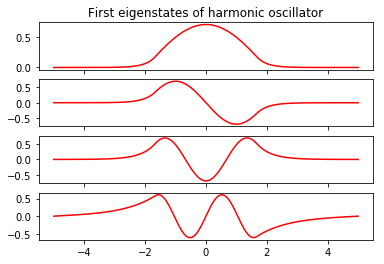

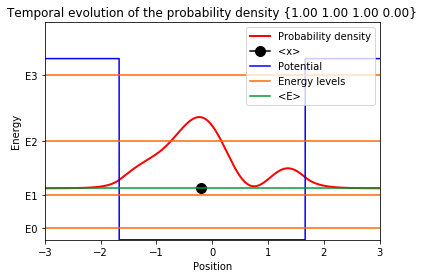

In [28]:
#Bloc del programa principal
%matplotlib inline

## Trobar valors propis
# Variables incials
n = ninter1 - 1
h = (rmax - rmin)/ninter1
# Definim el potencial harmonic
d = potencial(rmin,h,n)
# Trobem el valors propis
vp = tridiagonal.tridiagonal(d,h,n,n1,n2)
print vp

## Wavefunction numerica
# Redefinim intervals
n = ninter2 - 1
h = (rmax - rmin)/ninter2
# Inicialitzem variables
d = np.zeros(n)
x = np.zeros(n)
wfnt = np.zeros((n2,n))
wfat = np.zeros((n2,n))
# Redefinim el potencial
d = potencial(rmin,h,n)
# Calculem x abscisses
for i in xrange(1,n+1):
    x[i-1] = rmin + h*i
# Calculem les wavefunctions
for i in xrange(1,n2+1):
    wfnt[i-1,:] = wavefunction.wavefunction(d,h,n,vp[i-1])
# Grafics dels eigenstates
f, axarr = plt.subplots(4, sharex=True)
axarr[0].plot(x, wfnt[0,:], 'r-')
axarr[1].plot(x, wfnt[1,:], 'r-')
axarr[2].plot(x, wfnt[2,:], 'r-')
axarr[3].plot(x, wfnt[3,:], 'r-')
axarr[0].set_title('First eigenstates of harmonic oscillator')

## Simulacio de l'evolucio temporal 
# Normalization constant
N = np.sqrt(c0**2 + c1**2 + c2**2 + c3**2)
# Mean energy of the system 
E = 1/(N**2)*(vp[0]*c0**2 + vp[1]*c1**2 + vp[2]*c2**2 + vp[3]*c3**2)
# Calculem el potential 
v = potencial(rmin,h,n)
# Incialitzem <x>
x_mean = np.zeros(200)
# Set-up inicial de la simulacio
fig = plt.figure()
ax = plt.axes(xlim=(xlim_e,xlim_d), ylim=(ylimb,ylimd))
plt.xlabel('Position')
plt.ylabel('Energy')
plt.yticks(vp, ['E0','E1','E2','E3'])
line, = ax.plot([], [], lw=2, color='red', label='Probability density')
marker, = ax.plot([], [], marker='o', markersize='10', color='black', label='<x>')
ax.plot(x,v,'b-', label='Potential')
ax.plot([xlim_e,xlim_d],[vp[0],vp[0]],'-', color='#ff6600')
ax.plot([xlim_e,xlim_d],[vp[1],vp[1]],'-', color='#ff6600')
ax.plot([xlim_e,xlim_d],[vp[2],vp[2]],'-', color='#ff6600')
ax.plot([xlim_e,xlim_d],[vp[3],vp[3]],'-', color='#ff6600', label='Energy levels')
ax.plot([xlim_e,xlim_d],[E,E],'-', color='#009933', label='<E>')
plt.legend(loc="upper right")
string = 'Temporal evolution of the probability density {%.2f %.2f %.2f %.2f}' % (c0,c1,c2,c3)
plt.title(string)
# Inicialitzacio de la funcio del background del plot
def init():
    line.set_data([], [])
    marker.set_data([], [])
    return line, marker
# Funcio animador
def animate(i):
    t = w*i
    wf = 1/(N)*(c0*wfnt[0,:]*np.exp(-1j*vp[0]*t) + c1*wfnt[1,:]*np.exp(-1j*vp[1]*t)+ 
                                                 c2*wfnt[2,:]*np.exp(-1j*vp[2]*t) + c3*wfnt[3,:]*np.exp(-1j*vp[3]*t))
    wfc = 1/(N)*(c0*wfnt[0,:]*np.exp(1j*vp[0]*t) + c1*wfnt[1,:]*np.exp(1j*vp[1]*t)+ 
                                                 c2*wfnt[2,:]*np.exp(1j*vp[2]*t) + c3*wfnt[3,:]*np.exp(1j*vp[3]*t))
    y = wf*wfc
    x_mean = trapezoidal.trapezoidal(y,x,h)
    line.set_data(x, 0.5*ylim*y + E)
    marker.set_data(x_mean, E)
    return line, marker
# Cridem l'animador
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=200, interval=20, blit=True)
# Guardem la simulacio
anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()